<a href="https://colab.research.google.com/github/jerrybaba10/jerrybaba10/blob/main/Data%20Cleaning%20and%20Visualization/MeriSkill_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On this projec, we are given Human Resource data that contain features like Age, Attrition, Salary, etc. \
Our task is to clean the data and make some visualizations.




In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### So, we start by cleaning the data, by doing the following

- Deleting redundant columns
- Renaming the columns
- Dropping duplicates
- Cleaning individual columns
- Remove the NaN values from the dataset
- Check for some more Transformations




By careful study of the features, the following features seems redundant or irrelevant hence we will get rid of them:

EnvironmentSatisfaction, DailyRate, HourlyRate, MonthlyIncome, EmployeeCount, EmployeeNumber, Over18, StockOptionLevel, StandardHours

In [5]:
df1 = df.drop(['EnvironmentSatisfaction', 'DailyRate', 'HourlyRate',
               'MonthlyIncome', 'EmployeeCount','EmployeeNumber','Over18',
               'StandardHours','StockOptionLevel'], axis=1)
df1.shape

(1470, 26)


### Renaming columns

In [6]:
df2 = df1.rename(columns={'Education':'LevelEducation'})

### Duplicates are taken care of from step one

### Let's remove NaN values

In [7]:
df2.isnull().sum().any()

False

There are no NaN values in our dataset

### Checking for some more Transformations

Observing the data carefully, it appears most of the features have been tranformed already by labeled encoding.
Next, we will encode the remaining object features.

In [8]:
# Select columns of a specific data type (e.g., numeric)
non_numeric_columns = df2.select_dtypes(exclude=['int64', 'float64'])
non_numeric_columns.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [9]:
non_numeric_columns['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

Clearly, we should use OneHotEncoding because these features are nominal categorical variables and not ordinal, so it will be wrong to use labeled encoding.

In [10]:
df3 = pd.get_dummies(df2, columns=non_numeric_columns.columns)
df3.head()

,Age,DistanceFromHome,LevelEducation,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,2,4,19479,8,11,3,...,0,0,0,1,0,0,0,1,0,1
1,49,8,1,2,2,2,24907,1,23,4,...,0,0,1,0,0,0,1,0,1,0
2,37,2,2,2,1,3,2396,6,15,3,...,0,0,0,0,0,0,0,1,0,1
3,33,3,4,3,1,3,23159,1,11,3,...,0,0,1,0,0,0,1,0,0,1
4,27,2,1,3,1,2,16632,9,12,3,...,0,0,0,0,0,0,1,0,1,0


In [11]:
df3.shape

(1470, 48)

We now have 48 columns or features

### Data Visualization:

We are to visualize the following features.

- Plot a correlation map for all numeric variables
- Overtime
- Marital Status
- Job Role
- Gender
- Education Field
- Department
- Business Travel
- Relation between Overtime and Age
- Total Working Years
- Education Level
- Number of Companies Worked
- Distance from Home

Plotting a correlation map for all numeric variables

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

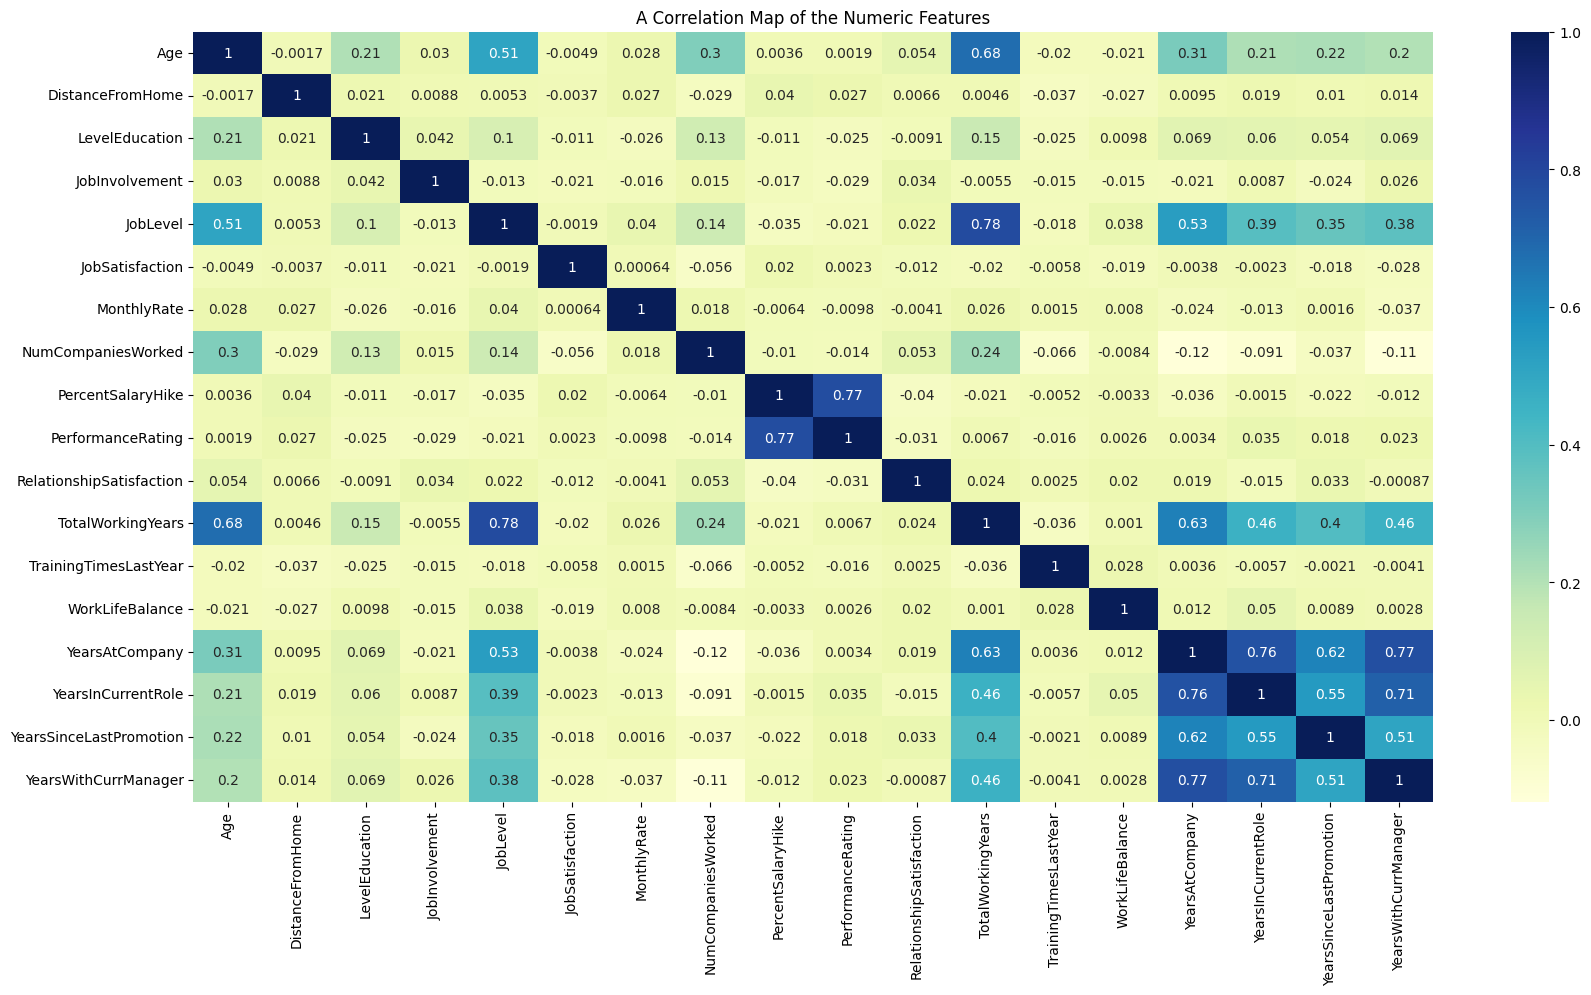

In [17]:
# Select columns of a numeric data type
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()
# df4 = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Add labels
#plt.xlabel("Features")
#plt.ylabel("Y-Axis")
plt.title("A Correlation Map of the Numeric Features")

# Show the heatmap
plt.show()


In [18]:
# Set a correlation threshold
threshold = 0.49  # You can adjust this threshold as needed

# Find highly correlated feature pairs
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Display highly correlated features
print("Highly correlated features:")
print(highly_correlated_features)


Highly correlated features:
{'JobLevel', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'}


### Visualizing the categorical variables

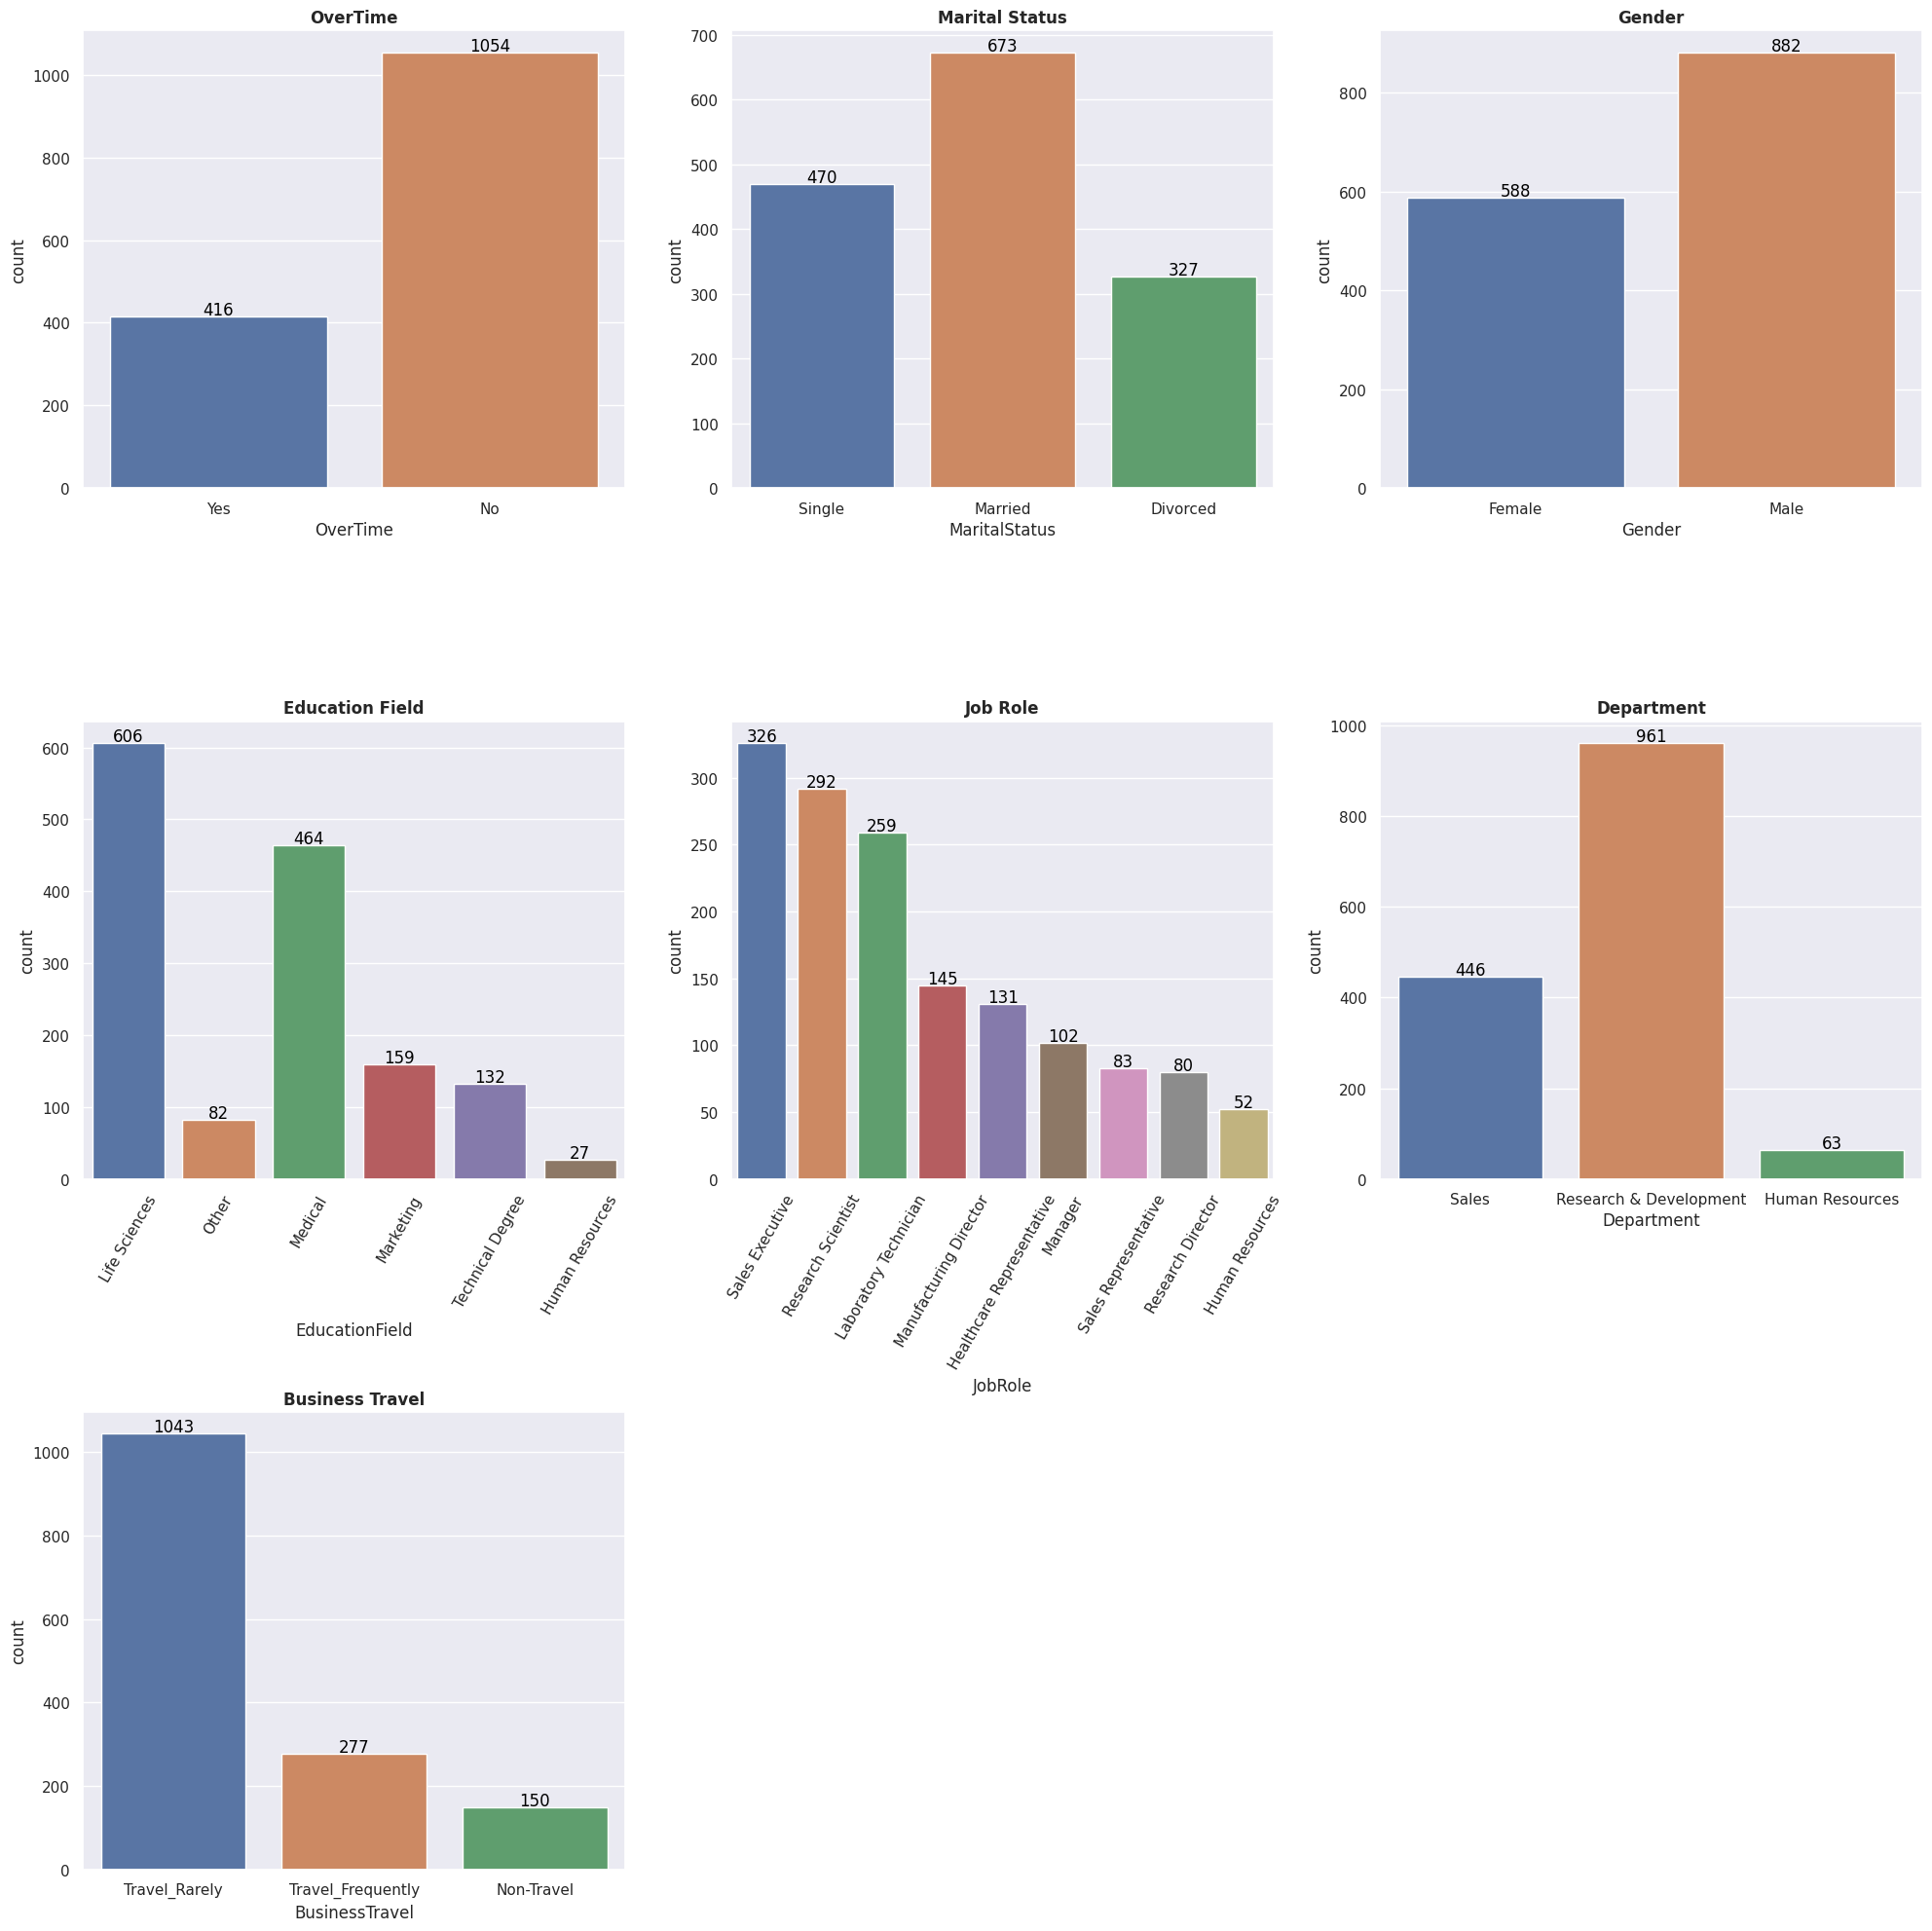

In [63]:
# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # 3 row, 3 columns

# Plot data on each subplot
overtime = sns.countplot(df2, x='OverTime',ax=axs[0,0])
axs[0,0].set_title('OverTime',weight="bold")


marital_status = sns.countplot(df2, x='MaritalStatus',ax=axs[0,1])
axs[0,1].set_title('Marital Status',weight="bold")



gender = sns.countplot(df2, x='Gender',ax=axs[0,2])
axs[0,2].set_title('Gender',weight="bold")

education_field = sns.countplot(df2, x='EducationField',ax=axs[1,0])
axs[1,0].set_title('Education Field',weight="bold")
axs[1,0].set_xticklabels(labels = df2.EducationField.unique(), rotation= 60)


jobrole = sns.countplot(df2, x='JobRole',ax=axs[1,1])
axs[1,1].set_title('Job Role',weight="bold")
axs[1,1].set_xticklabels(labels = df2.JobRole.unique(), rotation= 60)

department = sns.countplot(df2, x='Department',ax=axs[1,2])
axs[1,2].set_title('Department',weight="bold")


bussiness_travel = sns.countplot(df2, x='BusinessTravel',ax=axs[2,0])
axs[2,0].set_title('Business Travel', weight="bold")

axs[2,1].axis('off')  # Hide the subplot
axs[2,2].axis('off')  # Hide the subplot


# Adjust layout
plt.tight_layout()

# Annotate count values on the plot
plots = [overtime, marital_status, gender, education_field, jobrole, department, bussiness_travel]

for ax in plots:
  for p in ax.patches:
      ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the subplots
plt.show()


Lets visualize the relationship between Overtime and Age features

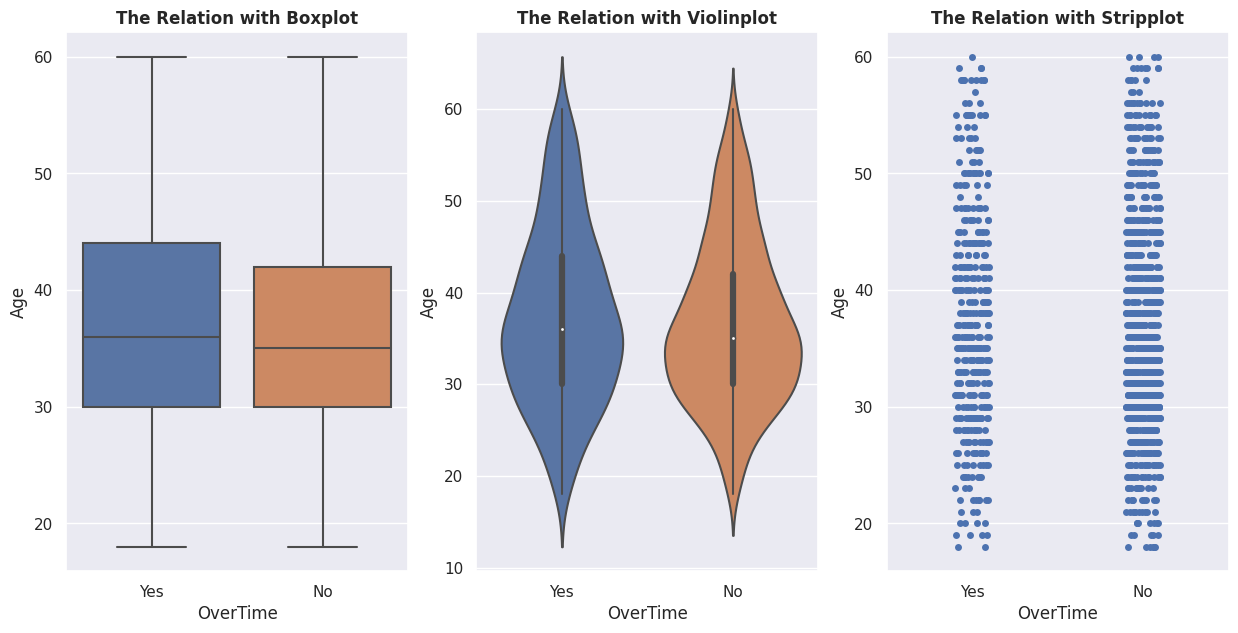

In [80]:
fig, axs = plt.subplots(1,3, figsize=(15, 7))  # 1 row, 3 columns
sns.boxplot(x= 'OverTime', y='Age', data=df2, ax=axs[0],)
axs[0].set_title('The Relation with Boxplot', weight = 'bold')
sns.violinplot(x= 'OverTime', y='Age', data=df2, ax=axs[1])
axs[1].set_title('The Relation with Violinplot', weight = 'bold')
sns.stripplot(x= 'OverTime', y='Age', data=df2, ax=axs[2])
axs[2].set_title('The Relation with Stripplot', weight = 'bold')
plt.show()

Visualizing continuous data

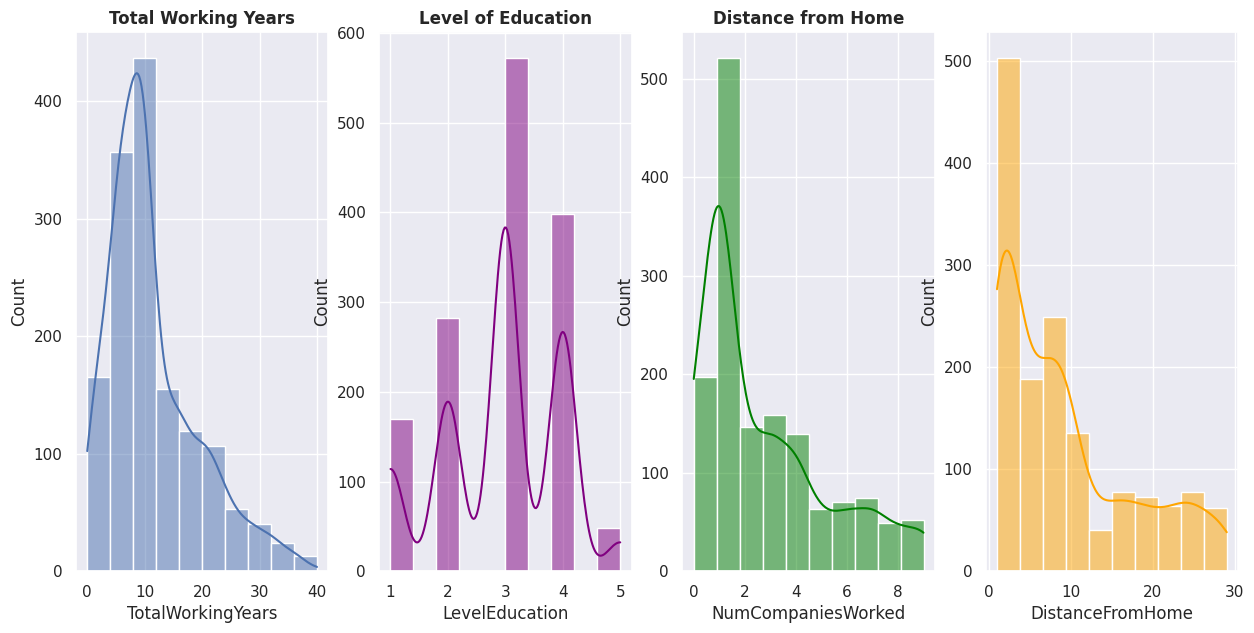

In [91]:
fig, axs = plt.subplots(1,4, figsize=(15, 7))  # 1 row, 3 columns
sns.histplot(x= 'TotalWorkingYears', data=df2, ax=axs[0], bins=10, kde=True)
axs[0].set_title('Total Working Years', weight = 'bold')
sns.histplot(x= 'LevelEducation', data=df2, ax=axs[1],bins=10,kde=True,color='purple')
axs[1].set_title('Level of Education', weight = 'bold')
sns.histplot(x= 'NumCompaniesWorked', data=df2, ax=axs[2],bins=10,kde=True,color='green')
axs[2].set_title('Number of Companies Worked Before', weight = 'bold')
sns.histplot(x= 'DistanceFromHome', data=df2, ax=axs[3],bins=10,kde=True,color='orange')
axs[2].set_title('Distance from Home', weight = 'bold')

plt.show()


Lets visualize contrition by some few features

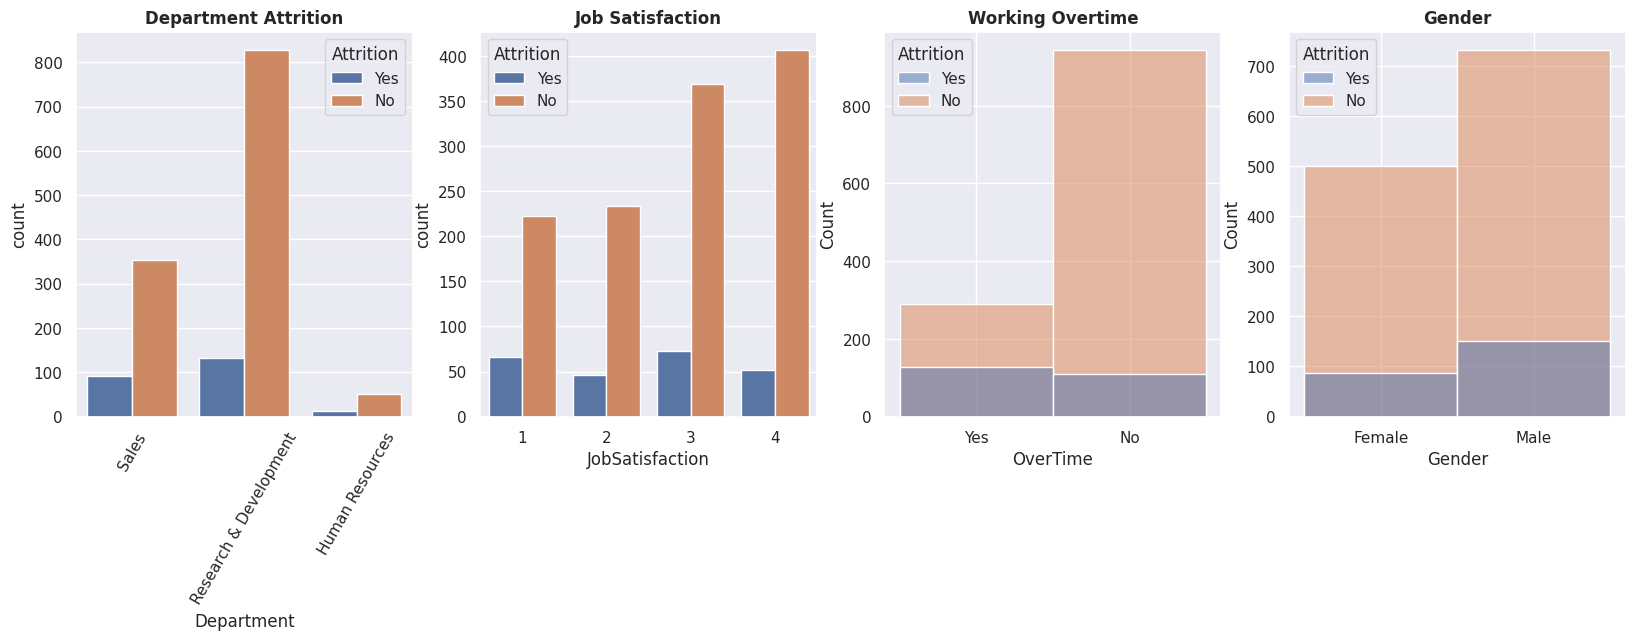

In [104]:
fig, axs = plt.subplots(1,4, figsize=(20, 5))  # 1 row, 3 columns
sns.countplot(x='Department', data=df2, hue='Attrition', ax=axs[0])
axs[0].set_title('Department Attrition', weight = 'bold')
axs[0].set_xticklabels(labels = df2.Department.unique(), rotation=60)
sns.countplot(x='JobSatisfaction', data=df2, hue='Attrition', ax=axs[1])
axs[1].set_title('Job Satisfaction', weight = 'bold')
sns.histplot(x= 'OverTime', data=df2, ax=axs[2],hue='Attrition')
axs[2].set_title('Working Overtime', weight = 'bold')
sns.histplot(x= 'Gender', data=df2, ax=axs[3],hue='Attrition')
axs[3].set_title('Gender', weight = 'bold')

plt.show()
